In [1]:
import os
import glob
import json
import pandas
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
results = {}
for model in os.listdir("results/"):
    file = "results/" + model + "/metrics.csv"
    with open(file) as f:
        results[model] = json.load(f)

In [3]:
pd.DataFrame(results["DDPM"]["metrics_by_fold"]).transpose()

,MAE,PCC,JSD,mae_pc,mae_ec,mae_bc,mae_clst,mae_deg
0,0.230615,0.010644,0.493137,0.000749,0.017708,0.020617,0.081113,0.392756
1,0.223901,0.071969,0.481099,0.000737,0.017780,0.021010,0.092601,0.427637
2,0.202769,0.265819,0.453246,0.000610,0.014524,0.020348,0.049784,0.305632


In [4]:
model_metrics = {}
for model_name, history in results.items():
    print(model_name)
    run_history = history["run_history"]
    metrics_history = history["metrics_by_fold"]

    metrics = pd.DataFrame(metrics_history).transpose()
    model_metrics[model_name] = metrics
    
    for run_id, run_data in run_history.items():
        # Combine the training and evaluation metrics
        usage_data = run_data.get("system_usage", [])
        eval_data = run_data.get("system_usage_eval", [])
        time = run_data.get("time")
        combined_data = usage_data + eval_data

        # Calculate the maximum RAM_MB and VRAM_MB
        max_ram = max(entry["RAM_MB"] for entry in combined_data if "RAM_MB" in entry)
        max_vram = max(entry["VRAM_MB"] for entry in combined_data if "VRAM_MB" in entry)
        
        print(f"Run {run_id}: Max RAM = {max_ram} MB, Max VRAM = {max_vram} MB, Time = {time:.3f} sec")


DDPM
Run 0: Max RAM = 1328.12109375 MB, Max VRAM = 16756.5 MB, Time = 166.199 sec
Run 1: Max RAM = 1419.1015625 MB, Max VRAM = 16758.5 MB, Time = 161.476 sec
Run 2: Max RAM = 1438.71875 MB, Max VRAM = 16758.5 MB, Time = 169.020 sec
DDPMTopology
Run 0: Max RAM = 1373.078125 MB, Max VRAM = 16778.5 MB, Time = 252.753 sec
Run 1: Max RAM = 1465.24609375 MB, Max VRAM = 16780.5 MB, Time = 275.650 sec
Run 2: Max RAM = 1484.359375 MB, Max VRAM = 16780.5 MB, Time = 320.334 sec
MLP
Run 0: Max RAM = 899.5390625 MB, Max VRAM = 1956.5 MB, Time = 182.774 sec
Run 1: Max RAM = 1021.71484375 MB, Max VRAM = 1956.5 MB, Time = 208.478 sec
Run 2: Max RAM = 1025.59375 MB, Max VRAM = 1956.5 MB, Time = 198.733 sec
slower
Run 0: Max RAM = 1371.59765625 MB, Max VRAM = 16778.5 MB, Time = 204.846 sec
Run 1: Max RAM = 1431.45703125 MB, Max VRAM = 16778.5 MB, Time = 172.027 sec
Run 2: Max RAM = 1443.7265625 MB, Max VRAM = 16778.5 MB, Time = 190.396 sec


In [5]:
model_metrics

{'DDPM':         MAE       PCC       JSD    mae_pc    mae_ec    mae_bc  mae_clst  \
 0  0.230615  0.010644  0.493137  0.000749  0.017708  0.020617  0.081113   
 1  0.223901  0.071969  0.481099  0.000737  0.017780  0.021010  0.092601   
 2  0.202769  0.265819  0.453246  0.000610  0.014524  0.020348  0.049784   
 
     mae_deg  
 0  0.392756  
 1  0.427637  
 2  0.305632  ,
 'DDPMTopology':         MAE       PCC       JSD    mae_pc    mae_ec    mae_bc  mae_clst  \
 0  0.197132  0.307868  0.456156  0.000614  0.014966  0.020318  0.044243   
 1  0.204124  0.294621  0.461123  0.000611  0.015220  0.020735  0.054005   
 2  0.208263  0.291086  0.485297  0.000621  0.014697  0.020463  0.065008   
 
     mae_deg  
 0  0.271959  
 1  0.296626  
 2  0.265254  ,
 'MLP':         MAE       PCC       JSD    mae_pc    mae_ec    mae_bc  mae_clst  \
 0  0.133748  0.660399  0.280833  0.000549  0.013739  0.020544  0.137862   
 1  0.140654  0.645783  0.288568  0.000549  0.014059  0.021050  0.143482   
 2  0.1

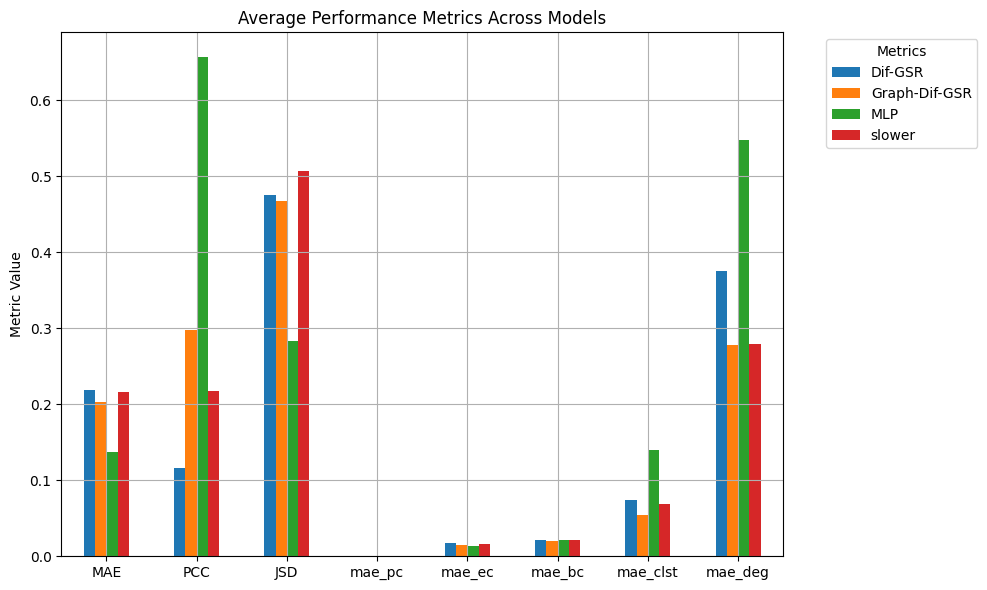

<Figure size 800x600 with 0 Axes>

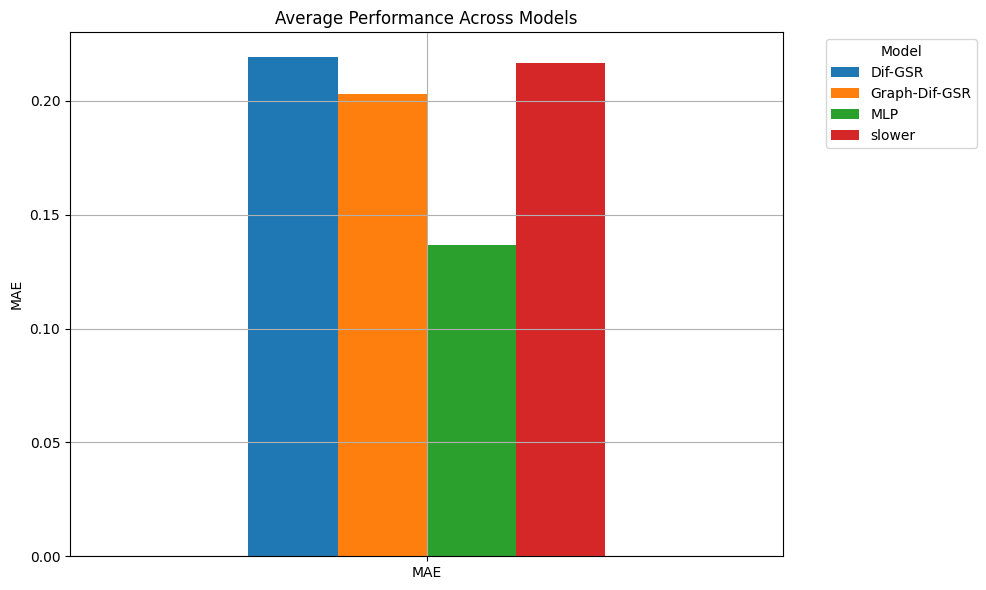

<Figure size 800x600 with 0 Axes>

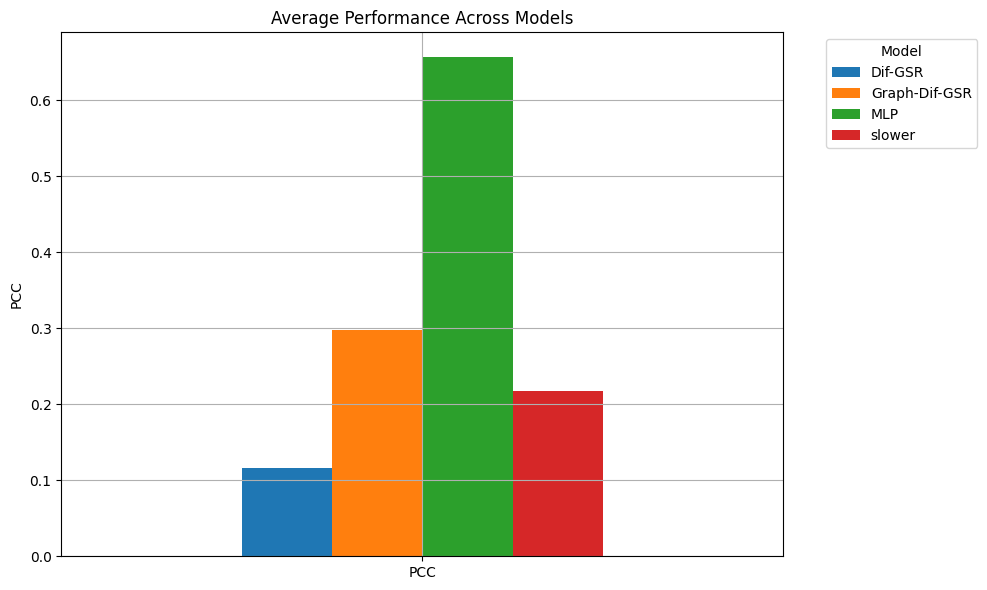

<Figure size 800x600 with 0 Axes>

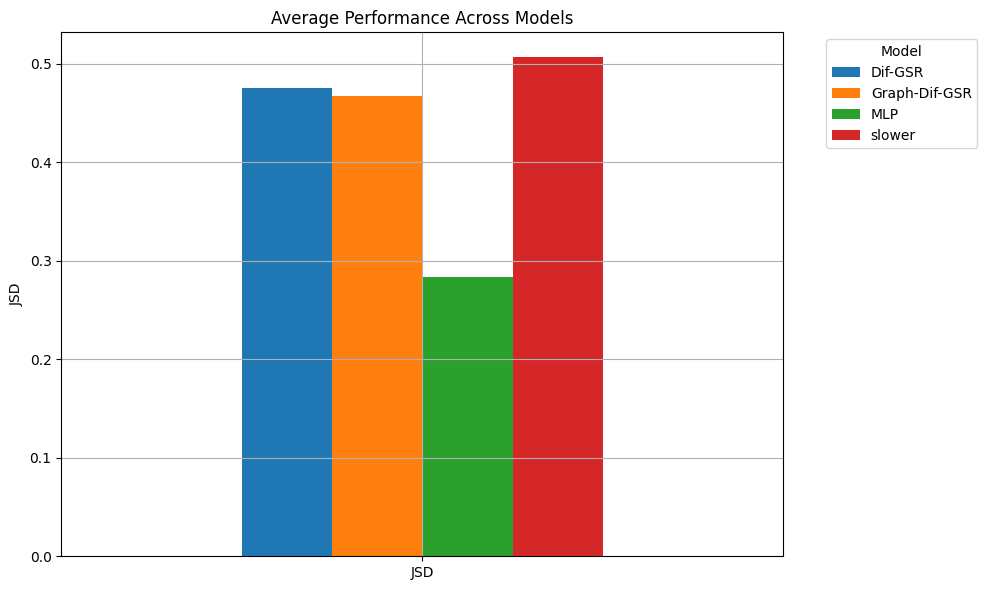

<Figure size 800x600 with 0 Axes>

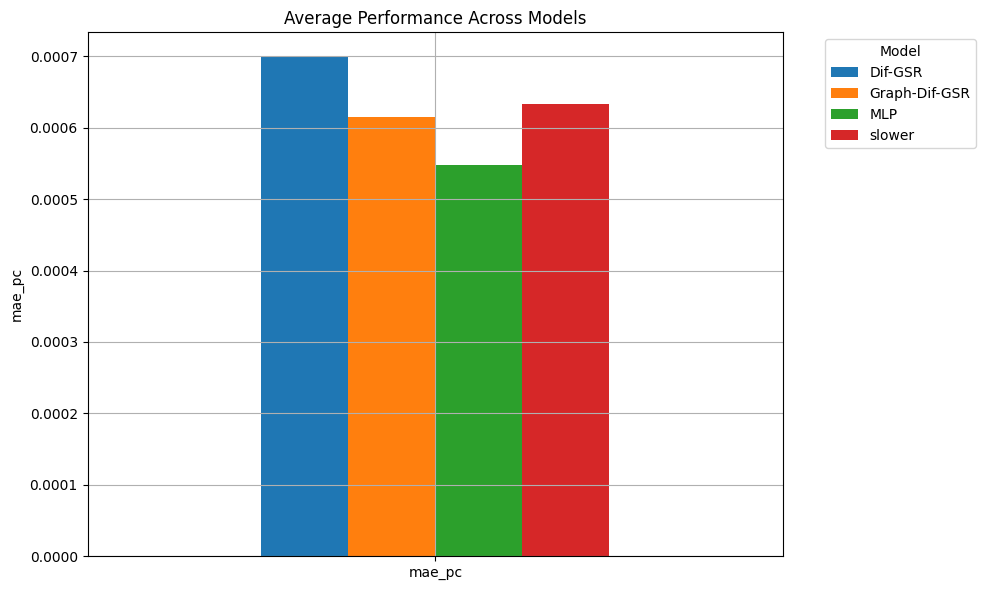

<Figure size 800x600 with 0 Axes>

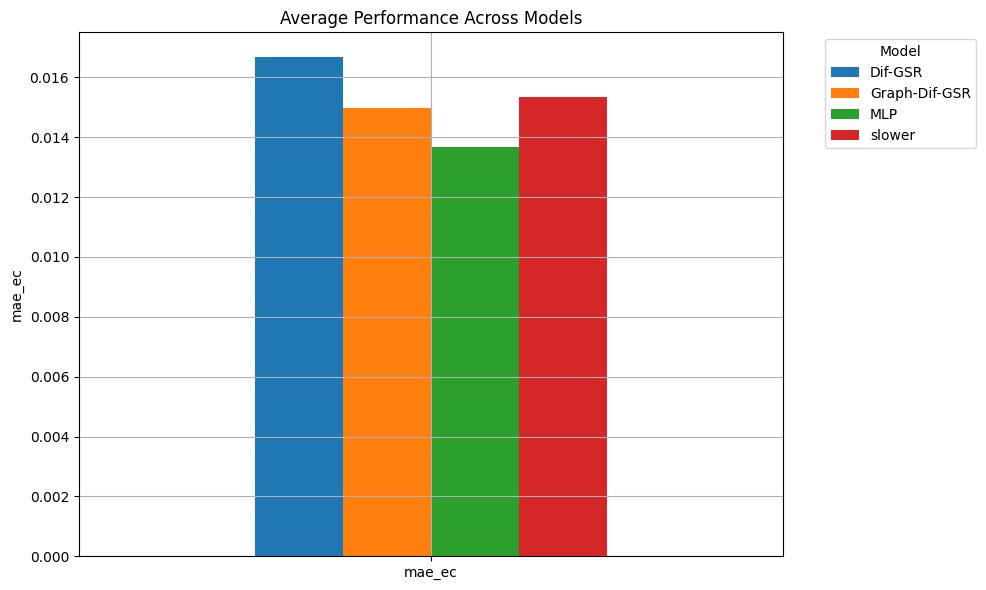

<Figure size 800x600 with 0 Axes>

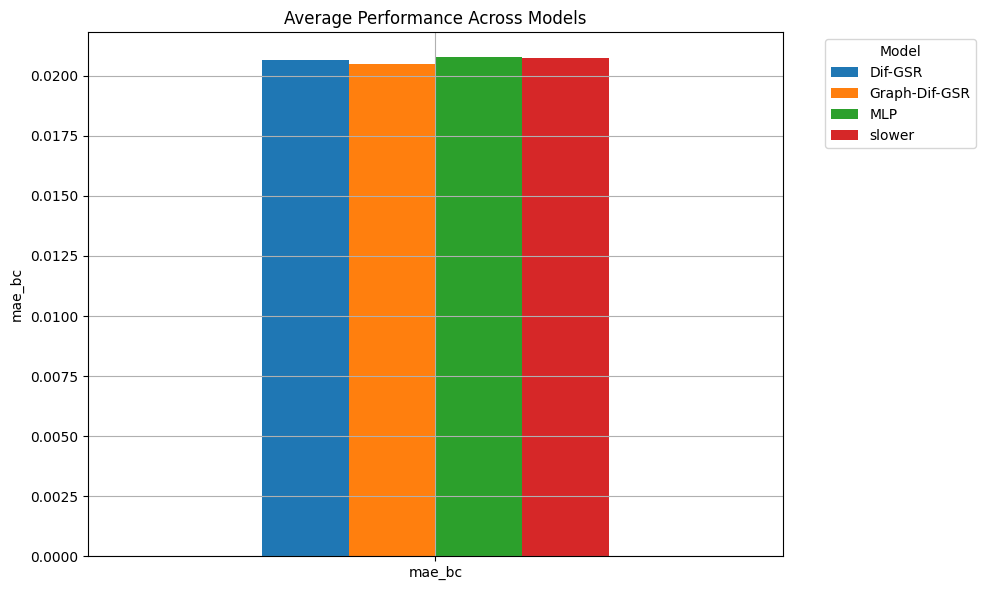

<Figure size 800x600 with 0 Axes>

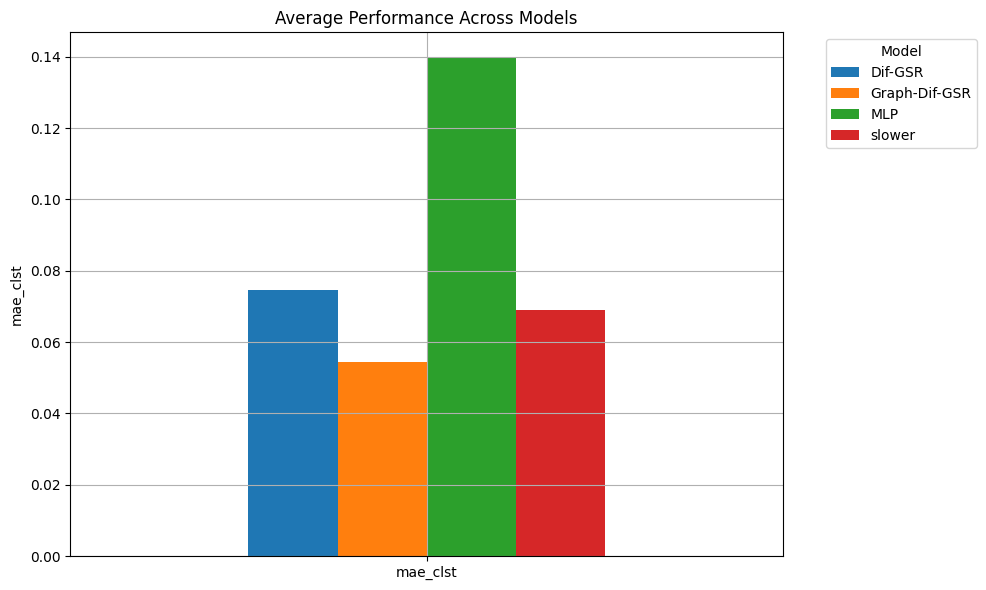

<Figure size 800x600 with 0 Axes>

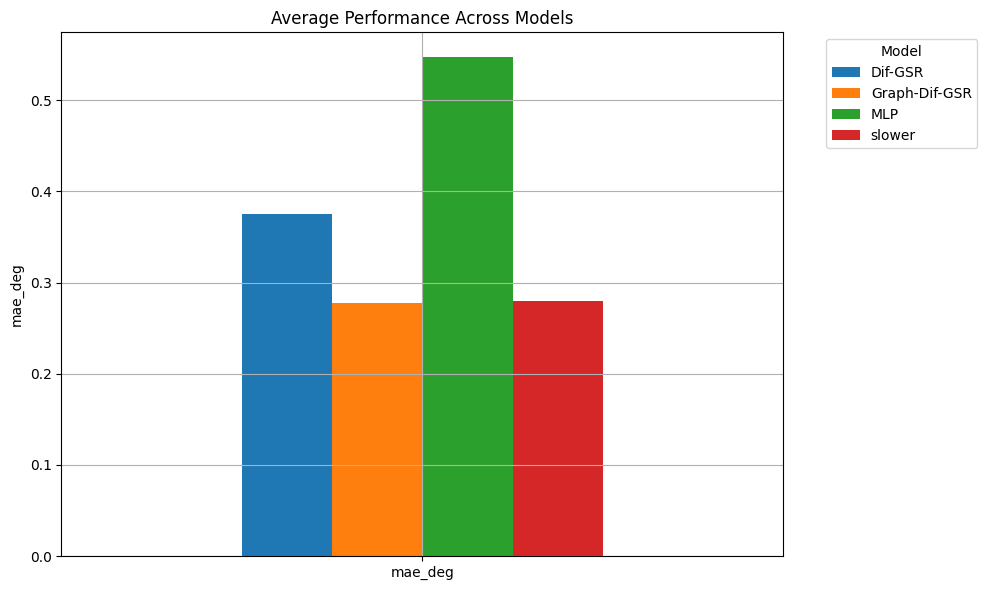

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert dictionary to a single DataFrame with multi-index for easier plotting
df_list = []
for model, df in model_metrics.items():
    df_temp = df.copy()
    df_temp['Fold'] = [0, 1, 2] # assume folds are indexed as 0, 1, 2
    if model == "DDPMTopology":
        model = "Graph-Dif-GSR"
    elif model == "DDPM":
        model = "Dif-GSR"
    df_temp['Model'] = model
    df_list.append(df_temp)
    metrics = df.columns
all_results = pd.concat(df_list, ignore_index=True)

# Calculate average performance for each model (grouped bar plot)
avg_results = all_results.groupby('Model').mean()
avg_results.drop(["Fold"], inplace=True, axis='columns')
# Plot grouped bar chart for average metrics across models
avg_results = avg_results.transpose()
avg_results.plot(kind='bar', figsize=(10, 6))
plt.title("Average Performance Metrics Across Models")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()
avg_results = avg_results.transpose()
# Plot line plots for each metric across folds for all models
for metric in metrics:
    plt.figure(figsize=(8, 6))

    metric_plot = avg_results[[metric]].transpose()
    # Plot grouped bar chart for average metrics across models
    metric_plot.plot(kind='bar', figsize=(10, 6))
    plt.title("Average Performance Across Models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid()
    plt.show()


    # sns.lineplot(data=all_results, x='Fold', y=metric, hue='Model', marker='o')
    # plt.title(f"{metric} Across Folds")
    # plt.ylabel(metric)
    # plt.xlabel("Fold")
    # plt.legend(title="Model")
    # plt.tight_layout()
    # plt.show()


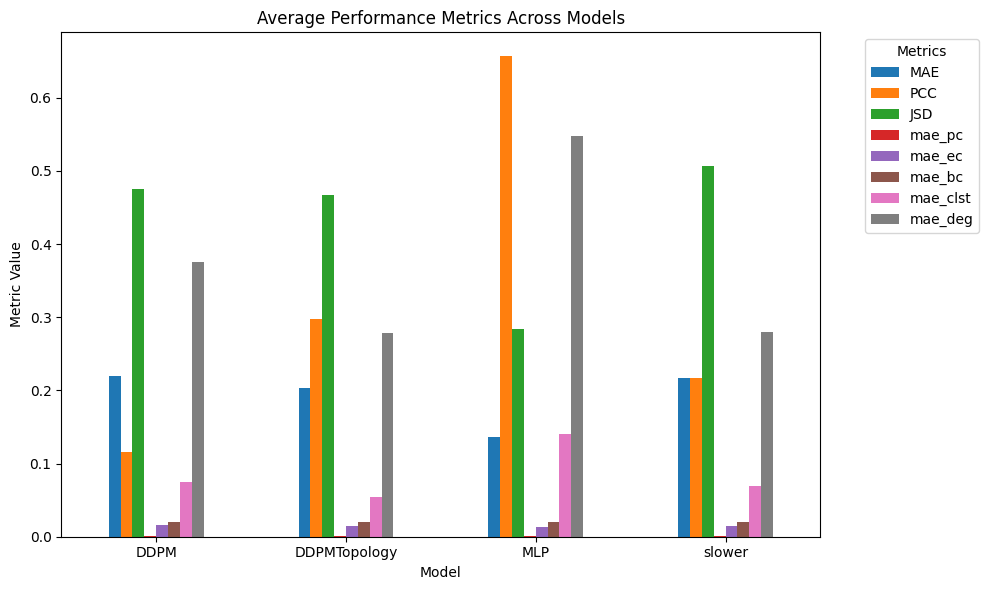

<Figure size 800x600 with 0 Axes>

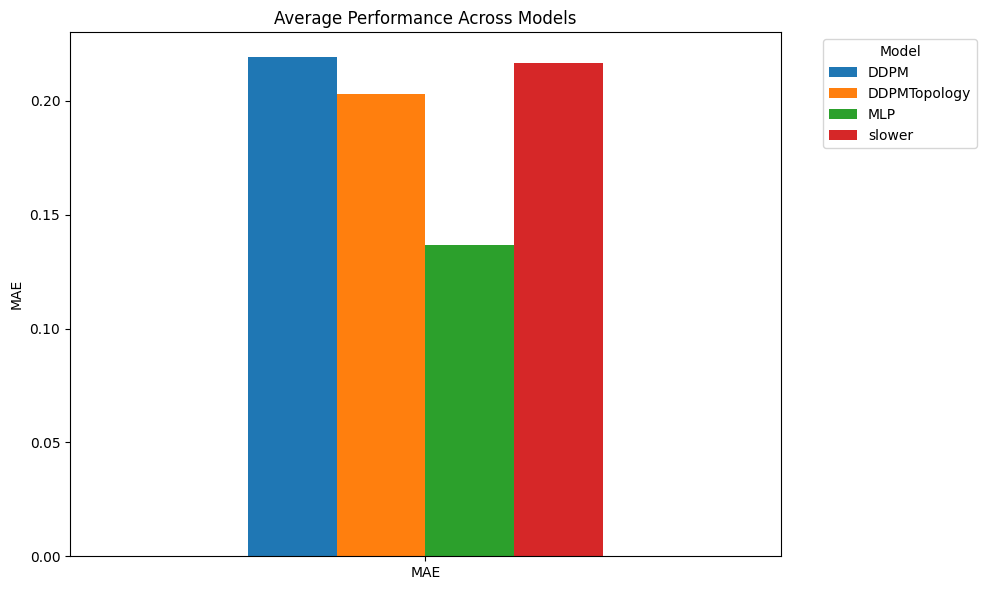

<Figure size 800x600 with 0 Axes>

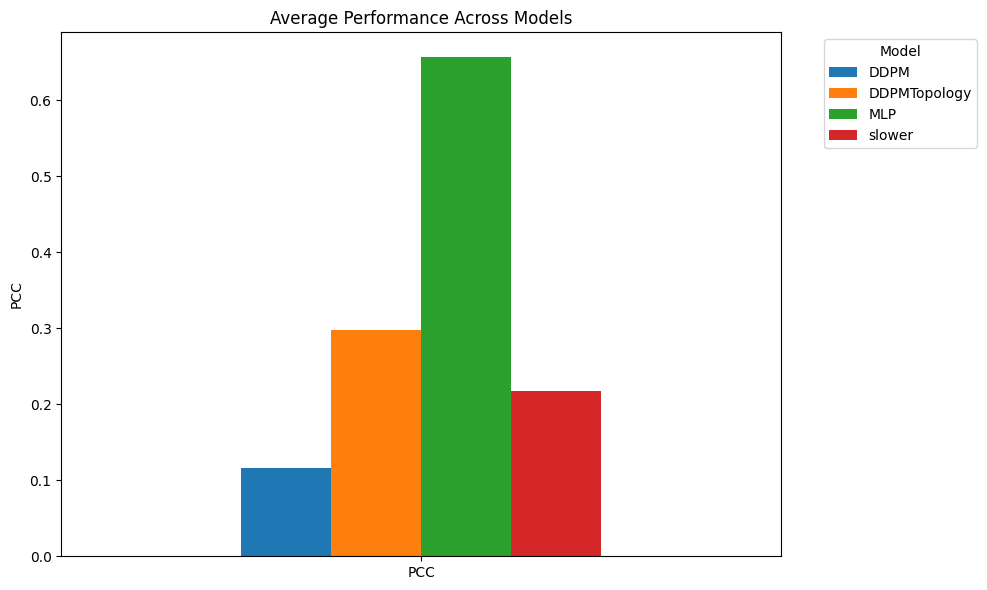

<Figure size 800x600 with 0 Axes>

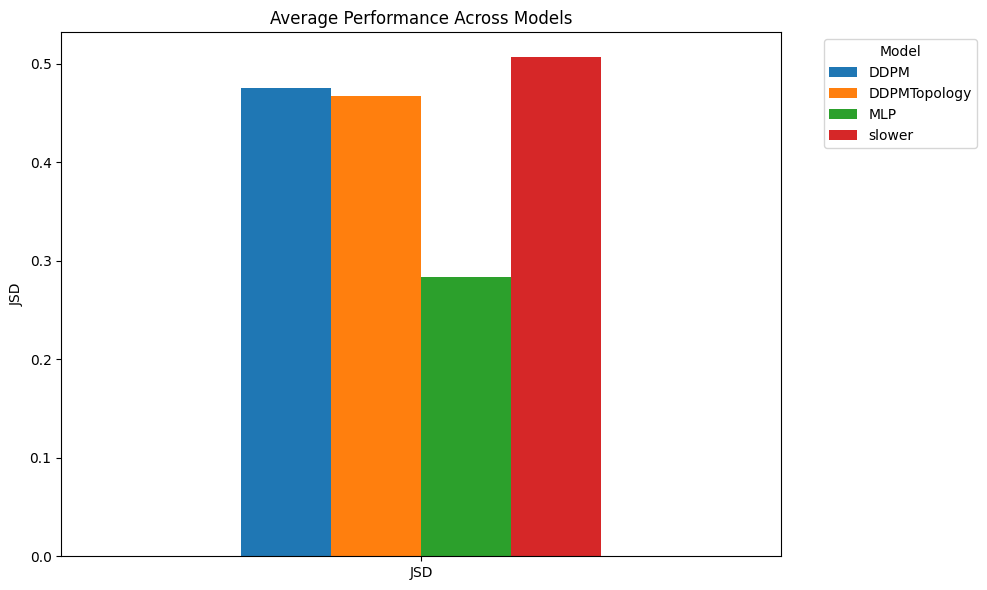

<Figure size 800x600 with 0 Axes>

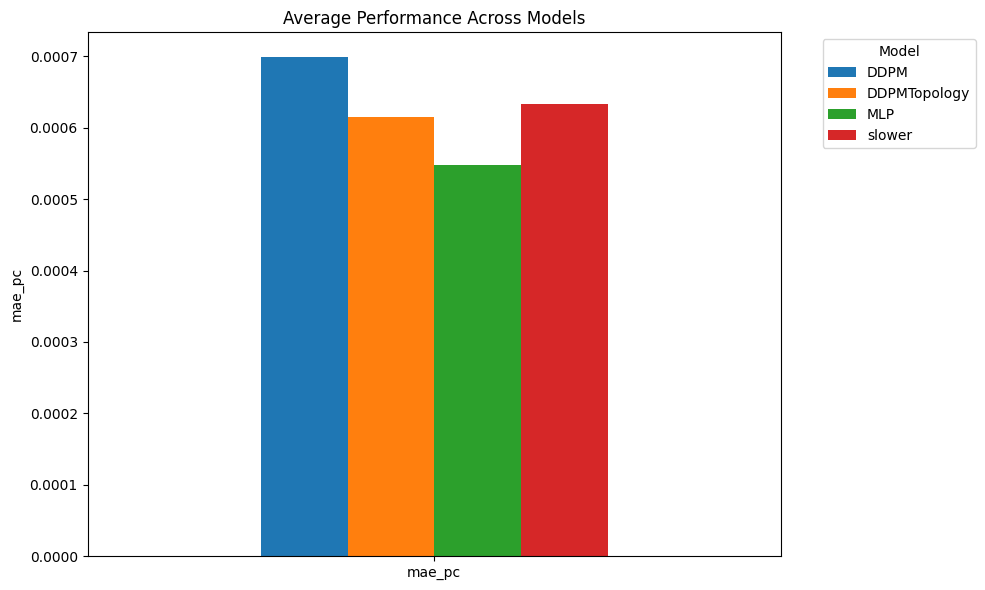

<Figure size 800x600 with 0 Axes>

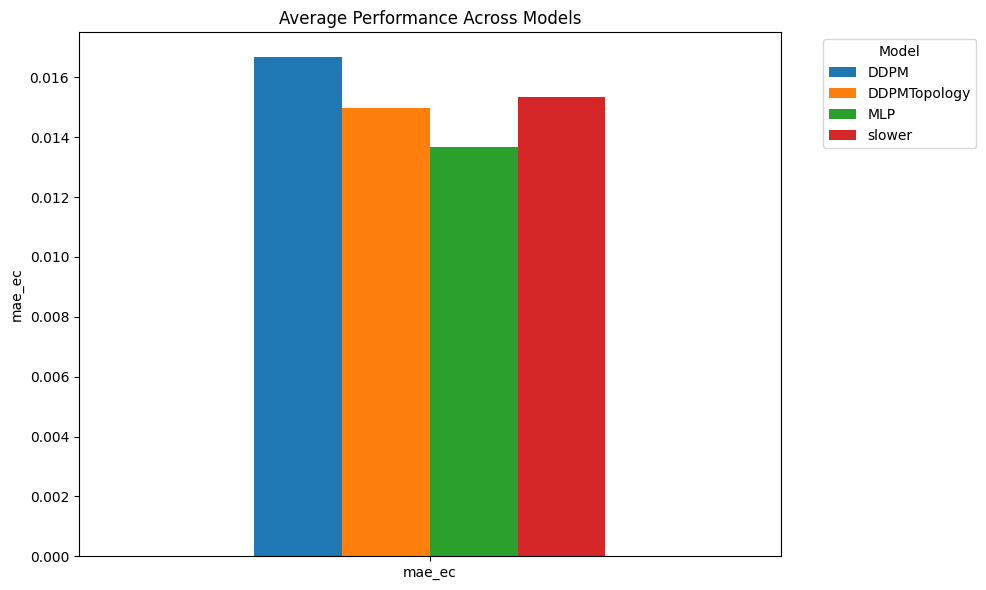

<Figure size 800x600 with 0 Axes>

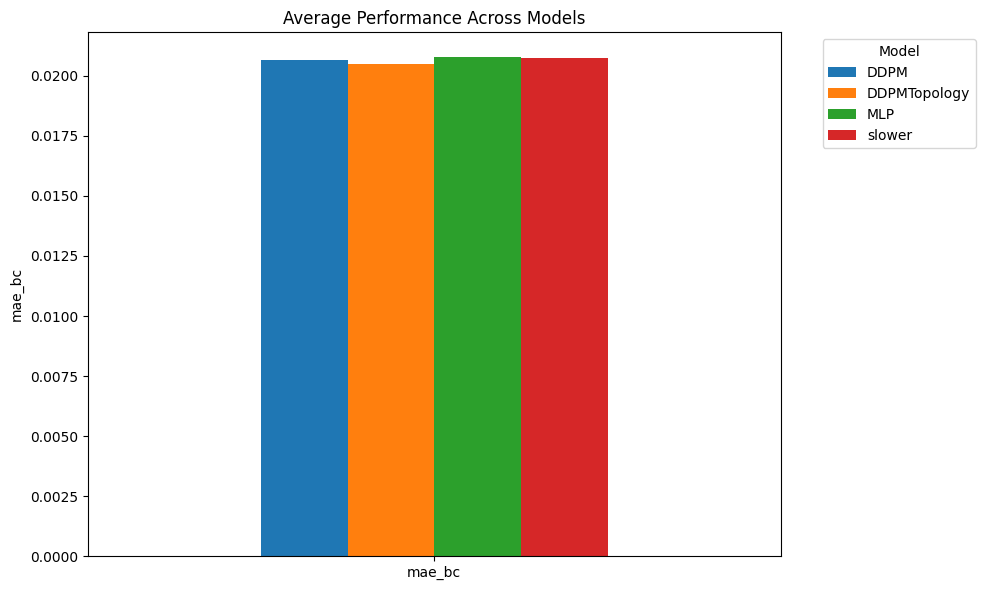

<Figure size 800x600 with 0 Axes>

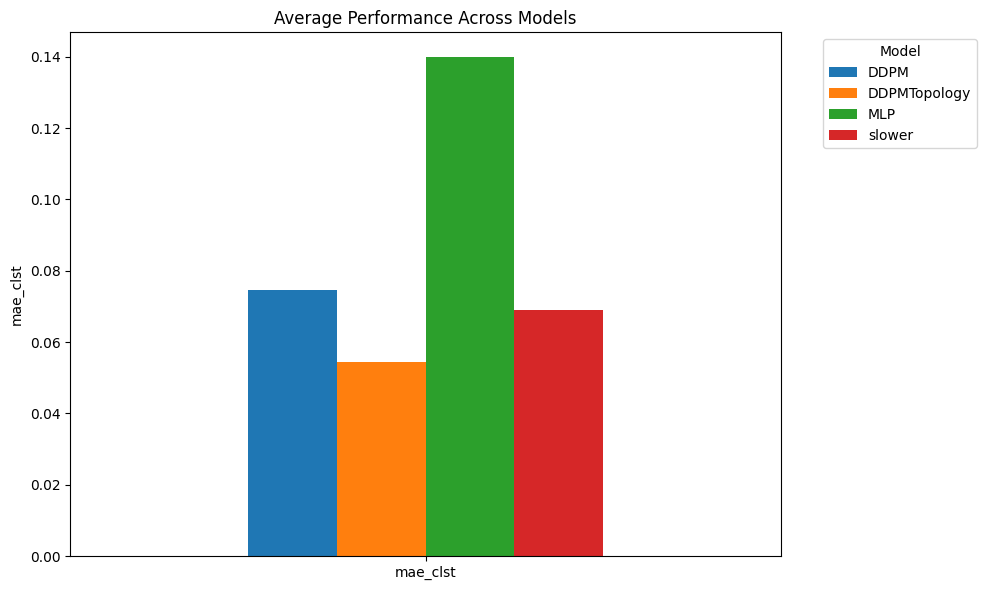

<Figure size 800x600 with 0 Axes>

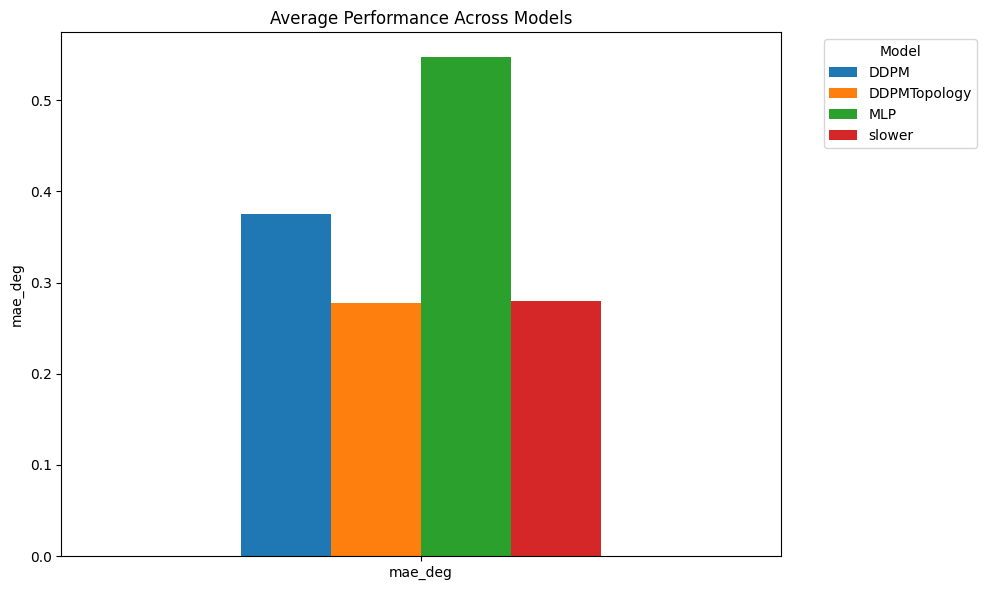

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert dictionary to a single DataFrame with multi-index for easier plotting
df_list = []
for model, df in model_metrics.items():
    df_temp = df.copy()
    df_temp['Fold'] = [0, 1, 2] # assume folds are indexed as 0, 1, 2
    df_temp['Model'] = model
    df_list.append(df_temp)
    metrics = df.columns
all_results = pd.concat(df_list, ignore_index=True)

# Calculate average performance for each model (grouped bar plot)
avg_results = all_results.groupby('Model').mean()
avg_results.drop(["Fold"], inplace=True, axis='columns')
# Plot grouped bar chart for average metrics across models
avg_results.plot(kind='bar', figsize=(10, 6))
plt.title("Average Performance Metrics Across Models")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot line plots for each metric across folds for all models
for metric in metrics:
    plt.figure(figsize=(8, 6))

    metric_plot = avg_results[[metric]].transpose()
    # Plot grouped bar chart for average metrics across models
    metric_plot.plot(kind='bar', figsize=(10, 6))
    plt.title("Average Performance Across Models")
    plt.ylabel(metric)
    plt.xticks(rotation=0)
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


    # sns.lineplot(data=all_results, x='Fold', y=metric, hue='Model', marker='o')
    # plt.title(f"{metric} Across Folds")
    # plt.ylabel(metric)
    # plt.xlabel("Fold")
    # plt.legend(title="Model")
    # plt.tight_layout()
    # plt.show()
